# **Project Name**    - Real Estate Investment Advisor: Predicting Property Profitability & Future Value







##### **Project Type**    - Regression + Classification + EDA + MLOps + Streamlit App deployment
##### **Contribution**    - Individual
##### **Team Member 1 -** Predeep Kumar
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

One of the most financially significant decisions that are taken by institutions and individuals is real estate investment. However, the natural market volatility and spatial heterogeneities together with the lack of advanced analytical tools creates a barrier in the ability of investors to determine the long-term returns. The proposed project titled the Real Estate Investment Advisor aims to fill this gap by creating a machine-learning-based application that is capable of interpreting the characteristics of the properties, predicting the future value, and identifying the promising investments. The system is able to generate a comprehensive decision-support application customised on real estate investors, purchasers, and industry stakeholders through synergising data analytics, predictive modelling, and interactive visualisation.

The general epigraph of the project is dichotomous. First of all, a classification model outlines properties as either Good Investment or Not a Good Investment, which is based on engineered properties (price per square foot, locality-based median pricing, property age, accessibility indices, and amenity variables). Secondly, using the current price, city-related appreciation rates, infrastructure indicators, and inherent property attributes, a regression model is used to forecast the expected price of the property in five years. The combination of these models allows investors to evaluate the qualitative, as well as the potential quantitative, merits of a property before committing to it.

The endeavour begins with data conditioning, which includes handling of missing values, removal of duplicates, outliers adjustment, coding of categorical variables and normalisation of numeric attributes. The domain-generated features such as price per square foot, school density index, transport accessibility score, and deviation against the median of the locality are designed to reflect the patterns of interest to investors. An artificial binary target variable, Good Investment is modeled by using the price competitiveness, property attributes and the price heuristics of appreciation.

The understanding of the market dynamics is based on Exploratory Data Analysis (EDA). The investigation uses visualisations and descriptive statistics to investigate location-specific price patterns, size to price relationships, property typology distributions, and the effects of amenities and accessibility on valuations. The correlational analyses determine those features that have the strongest effect on the investment potential and future value, which determines further modelling choices.

Two different machine-learning pipelines are then designed, one that is based on classification and the other regression-based. Logistic Regression, Random Forest, and XGBoost algorithms are checked on classification activities and Linear Regression, Random Forest Regressor, and XGBoost Regressor are analysed on price prediction. The measures of model efficacy are assessed by Accuracy, Precision, Recall, and ROC-AUC on classification, and RMSE, MAE, and R 2 on regression. The use of MLflow is to catalogue experiments, compare performance metrics, record hyperparameters and store model artefacts therefore imparting reproducibility and version control.

The final structure is implemented as an application of Streamlit associated with users. Upon end-user input of property specifications, such as geographic coordinates, spatial sizes, the number of bedrooms and bathrooms, amenity profile, and the current price, the interface generates the classification of the investment, predicts the five-year price and displays the confidence scores alongside visual representation (geospatial heatmaps, time series trend plots, etc.). This is an interactive portal that democratises advanced analytics among audiences who do not possess technical skills.

Overall, the Real Estate Investment Advisor transformed the unprocessed housing data into a convenient tool of investment advice. The project demonstrates the potential of data-driven decision support in the property industry through providing investors with reliable information, automated assessment of properties to real-estate businesses, and helping to resolve the issue of opacities during the acquisition process.

# **GitHub Link -**

Provide your GitHub Link here.



# **Problem Statement**


Develop a machine learning application to assist potential investors in making real estate decisions. The system should:
- Classify whether a property is a "Good Investment" (Classification).
- Predict the estimated property price after 5 years (Regression).

Use the provided dataset to preprocess and analyze the data, engineer relevant features, and deploy a user-interactive application using Streamlit that provides investment recommendations and price forecasts. MLflow will be used for experiment tracking.

**Business Use Cases**
- ✅ Empower real estate investors with intelligent tools to assess long-term returns.
- ✅ Support buyers in choosing high-return properties in developing areas.
- ✅ Help real estate companies automate investment analysis for listings.
- ✅ Improve customer trust in real estate platforms with data-backed predictions.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

#  Data Processing & Feature Engineering  

**Objective of this notebook**

1. Load the raw dataset `india_housing_prices.csv`.
2. Perform basic data cleaning:
   - Strip whitespace
   - Remove duplicates
   - Fix data types
   - Filter impossible values (e.g., non-positive area / price)
   - Get an overview of missing values
3. Engineer key features:
   - `Price_per_SqFt`
   - `Future_Price_5Y` (Regression target)
   - `Investment_Score`
   - `Good_Investment` (Classification target)
   - `Amenities_Count` (for EDA)
4. Save:
   - Base cleaned dataset → `india_housing_cleaned_base.csv`
   - Feature-engineered dataset → `india_housing_cleaned.csv`


## ***Know Your Data***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Libraries

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
# Import Libraries
import pandas as pd        # For loading and handling tabular data
import numpy as np         # For numerical operations
import matplotlib.pyplot as plt  # For data visualization (basic plots)
import seaborn as sns      # For advanced visualizations
import datetime

### Dataset Loading

In [ ]:
# Load Dataset
# Path to the raw dataset
# ==== PATH CONFIG (Using your Google Drive path) ====

DATA_PATH = "/content/drive/MyDrive/Real_Estate_Investment_Advisor/data/raw/india_housing_prices.csv"

# We'll save processed files in the same project folder under /data/processed
PROCESSED_DIR = "/content/drive/MyDrive/Real_Estate_Investment_Advisor/data/processed"
os.makedirs(PROCESSED_DIR, exist_ok=True)

BASE_CLEAN_PATH = os.path.join(PROCESSED_DIR, "india_housing_cleaned_base.csv")
FINAL_CLEAN_PATH = os.path.join(PROCESSED_DIR, "india_housing_cleaned.csv")

print("Raw data path:", DATA_PATH)
print("Processed data directory:", PROCESSED_DIR)

Raw data path: /content/drive/MyDrive/Real_Estate_Investment_Advisor/data/raw/india_housing_prices.csv
Processed data directory: /content/drive/MyDrive/Real_Estate_Investment_Advisor/data/processed


### Dataset First View

In [ ]:
# Dataset First Look
# Show the first few rows to confirm successful loading
df_raw = pd.read_csv(DATA_PATH)
df_raw.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Number of rows and columns in the dataset
rows, cols = df_raw.shape

print(f"Total Rows    : {rows}")
print(f"Total Columns : {cols}")

Total Rows    : 250000
Total Columns : 23


### Dataset Information

In [ ]:
# Dataset Info
# Provides column names, data types, and non-null counts
print("==== Data Info ====")
df_raw.info()

==== Data Info ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 

In [ ]:
print("Column Names:\n")
for col in df_raw.columns:
    print(col)

Column Names:

ID
State
City
Locality
Property_Type
BHK
Size_in_SqFt
Price_in_Lakhs
Price_per_SqFt
Year_Built
Furnished_Status
Floor_No
Total_Floors
Age_of_Property
Nearby_Schools
Nearby_Hospitals
Public_Transport_Accessibility
Parking_Space
Security
Amenities
Facing
Owner_Type
Availability_Status


Basic Statistics for Numeric Columns

In [ ]:
df_raw.describe()

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


## Copy to Working DF & Basic Cleaning

In [ ]:
# Work on a copy to keep raw safe
df = df_raw.copy()

#  Strip whitespace from all string/object columns
obj_cols = df.select_dtypes(include="object").columns
for col in obj_cols:
    df[col] = df[col].astype(str).str.strip()

Remove full duplicate rows


In [ ]:
# Remove full duplicate rows
before_dupes = df.shape[0]
df = df.drop_duplicates().reset_index(drop=True)
after_dupes = df.shape[0]
print(f"Removed {before_dupes - after_dupes} duplicate rows.")

Removed 0 duplicate rows.


Filter impossible values: non-positive size or price

In [ ]:
#  Filter impossible values: non-positive size or price
before_filter = df.shape[0]
if "Size_in_SqFt" in df.columns:
    df = df[df["Size_in_SqFt"] > 0]
if "Price_in_Lakhs" in df.columns:
    df = df[df["Price_in_Lakhs"] > 0]

after_filter = df.shape[0]
print(f"Removed {before_filter - after_filter} rows with invalid size/price.")

print("Shape after basic cleaning:", df.shape)

Removed 0 rows with invalid size/price.
Shape after basic cleaning: (250000, 23)


#### Missing Values/Null Values

In [ ]:

missing_ratio = df.isna().mean().sort_values(ascending=False)
missing_df = missing_ratio.to_frame(name="missing_ratio")
missing_df["missing_percent"] = (missing_df["missing_ratio"] * 100).round(2)

print("==== Missing Value Ratios (Top 20) ====")
missing_df.head(20)

==== Missing Value Ratios (Top 20) ====


,missing_ratio,missing_percent
ID,0.0,0.0
State,0.0,0.0
City,0.0,0.0
Locality,0.0,0.0
Property_Type,0.0,0.0
BHK,0.0,0.0
Size_in_SqFt,0.0,0.0
Price_in_Lakhs,0.0,0.0
Price_per_SqFt,0.0,0.0
Year_Built,0.0,0.0


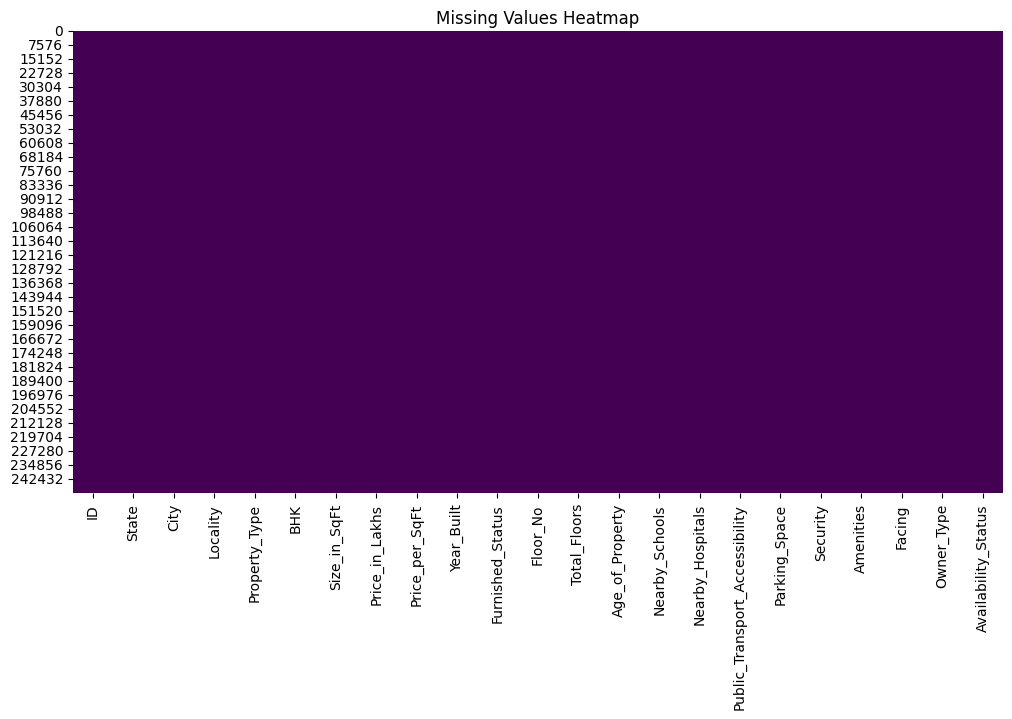

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

## Sanity Check on Key Features

In [ ]:
key_cols = ["Price_in_Lakhs", "Size_in_SqFt", "City", "State", "Property_Type"]

for col in key_cols:
    if col in df.columns:
        total = len(df)
        missing = df[col].isna().sum()
        print(f"{col}: missing {missing} / {total} ({missing / total:.2%})")
    else:
        print(f"{col}: NOT FOUND in dataset!")

# Quick frequency tables for some important categorical features
for col in ["State", "City", "Property_Type", "Furnished_Status", "Availability_Status"]:
    if col in df.columns:
        print(f"\n==== Value counts for {col} (Top 10) ====")
        print(df[col].value_counts(dropna=False).head(10))

Price_in_Lakhs: missing 0 / 250000 (0.00%)
Size_in_SqFt: missing 0 / 250000 (0.00%)
City: missing 0 / 250000 (0.00%)
State: missing 0 / 250000 (0.00%)
Property_Type: missing 0 / 250000 (0.00%)

==== Value counts for State (Top 10) ====
State
Odisha           12681
Tamil Nadu       12629
West Bengal      12622
Gujarat          12578
Delhi            12552
Telangana        12539
Maharashtra      12533
Punjab           12516
Uttar Pradesh    12508
Uttarakhand      12501
Name: count, dtype: int64

==== Value counts for City (Top 10) ====
City
Coimbatore     6461
Ahmedabad      6411
Silchar        6404
Durgapur       6387
Cuttack        6358
Vijayawada     6344
Jamshedpur     6335
Bhubaneswar    6323
New Delhi      6306
Kochi          6305
Name: count, dtype: int64

==== Value counts for Property_Type (Top 10) ====
Property_Type
Villa                83744
Independent House    83300
Apartment            82956
Name: count, dtype: int64

==== Value counts for Furnished_Status (Top 10) ====
Fur

2. Check for Unrealistic Property Sizes

In [ ]:
#Size_in_SqFt Sanity Check

# Define thresholds for unrealistic sizes
# (Below 300 sqft OR above 6000 sqft)
invalid_size = df_raw[(df_raw["Size_in_SqFt"] < 300) | (df_raw["Size_in_SqFt"] > 6000)]

print(f"❗ Properties with unrealistic Size_in_SqFt: {len(invalid_size)}")

# Show sample rows if found
if len(invalid_size) > 0:
    invalid_size.head()

❗ Properties with unrealistic Size_in_SqFt: 0


3. Check for Year_Built in the Future

In [ ]:
#Year_Built Sanity Check

from datetime import datetime

current_year = datetime.now().year

# Check for properties built in future
invalid_year = df_raw[df_raw["Year_Built"] > current_year]

print(f"❗ Properties with Year_Built in the future: {len(invalid_year)}")

# Show sample rows if found
if len(invalid_year) > 0:
    invalid_year.head()

❗ Properties with Year_Built in the future: 0


4. Check Price_per_SqFt for 0 or Negative

In [ ]:
invalid_price_sqft = df[df["Price_per_SqFt"] <= 0]

print(f"❗ Properties with Price_per_SqFt = 0 or less: {len(invalid_price_sqft)}")

if len(invalid_price_sqft) > 0:
    display(invalid_price_sqft.head(10))

❗ Properties with Price_per_SqFt = 0 or less: 2534


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
190,191,Rajasthan,Jaipur,Locality_99,Villa,4,4467,11.62,0.0,1992,...,33,10,5,Low,Yes,Yes,Playground,West,Owner,Under_Construction
214,215,Jharkhand,Ranchi,Locality_192,Villa,2,3471,17.01,0.0,2019,...,6,9,1,High,No,Yes,"Clubhouse, Garden",West,Owner,Under_Construction
272,273,Uttar Pradesh,Lucknow,Locality_166,Independent House,1,4497,21.01,0.0,2012,...,13,7,6,High,No,No,"Pool, Clubhouse, Garden, Playground",East,Owner,Ready_to_Move
356,357,Haryana,Gurgaon,Locality_42,Apartment,3,3498,12.80,0.0,2000,...,25,5,3,Medium,No,Yes,Garden,West,Owner,Under_Construction
387,388,West Bengal,Durgapur,Locality_304,Villa,2,4775,18.34,0.0,2013,...,12,4,2,Medium,Yes,Yes,"Clubhouse, Gym",West,Builder,Ready_to_Move
551,552,Gujarat,Ahmedabad,Locality_47,Independent House,2,3438,15.67,0.0,1997,...,28,9,9,High,No,Yes,"Playground, Pool, Garden, Clubhouse, Gym",West,Broker,Ready_to_Move
596,597,Telangana,Hyderabad,Locality_20,Independent House,5,4453,18.89,0.0,2003,...,22,8,9,High,No,No,"Playground, Garden, Gym, Clubhouse",North,Builder,Under_Construction
654,655,Odisha,Bhubaneswar,Locality_170,Independent House,4,4479,14.73,0.0,2023,...,2,2,6,Medium,No,Yes,"Clubhouse, Pool",East,Owner,Under_Construction
1023,1024,Haryana,Gurgaon,Locality_498,Apartment,5,2888,10.30,0.0,2021,...,4,7,8,High,No,Yes,"Gym, Garden, Pool, Playground, Clubhouse",West,Builder,Under_Construction
1133,1134,Uttarakhand,Haridwar,Locality_290,Independent House,4,4718,17.80,0.0,2019,...,6,7,10,Medium,No,Yes,"Pool, Gym, Garden, Playground",South,Broker,Under_Construction


## Derive / Fix Age_of_Property

In [ ]:


# If Age_of_Property column is missing, create it
if "Age_of_Property" not in df.columns:
    df["Age_of_Property"] = np.nan

# If Year_Built exists, use it to fill Age_of_Property where possible
if "Year_Built" in df.columns:
    valid_year_mask = (df["Year_Built"].notna()) & (df["Year_Built"] <= current_year)
    df.loc[valid_year_mask, "Age_of_Property"] = current_year - df.loc[valid_year_mask, "Year_Built"]

print("Age_of_Property - summary (after derivation):")
display(df["Age_of_Property"].describe())

Age_of_Property - summary (after derivation):


,Age_of_Property
count,250000.000000
mean,18.479988
std,9.808575
min,2.000000
25%,10.000000
50%,18.000000
75%,27.000000
max,35.000000


## Drop Rows with Critical Missing Values & Save Base Clean

In [ ]:
# For base cleaned data, we ensure:
# - Price_in_Lakhs and Size_in_SqFt must be present
# - City and State should not be missing (important for later logic)

critical_cols = ["Price_in_Lakhs", "Size_in_SqFt", "City", "State"]
before_critical = df.shape[0]
df_base = df.dropna(subset=[col for col in critical_cols if col in df.columns])
after_critical = df_base.shape[0]

print(f"Dropped {before_critical - after_critical} rows due to missing critical fields.")
print("Shape of base cleaned dataset:", df_base.shape)

# Save base cleaned dataset
df_base.to_csv(BASE_CLEAN_PATH, index=False)
print("Base cleaned dataset saved to:", BASE_CLEAN_PATH)

Dropped 0 rows due to missing critical fields.
Shape of base cleaned dataset: (250000, 23)
Base cleaned dataset saved to: /content/drive/MyDrive/Real_Estate_Investment_Advisor/data/processed/india_housing_cleaned_base.csv


### What did you know about your dataset?

- The dataset contains 250,000 property records with 23 features, giving a large and rich sample for analysis and modeling.

- There are no missing values in any column, meaning the dataset is complete and does not require null-value imputation.

- There are no duplicate rows, confirming that each property entry is unique and correctly recorded.

- Numeric values such as Price_in_Lakhs, Size_in_SqFt, BHK, Year_Built, Age_of_Property, Schools, Hospitals all fall within realistic and expected ranges.

- No invalid prices (0 or negative) and no unrealistic property sizes (<300 sqft or >6000 sqft) were found.

- Year_Built values are valid (none are in the future), indicating the construction year data is clean and correct.

- Around 2,534 records have Price_per_SqFt = 0, which indicates these properties need price recalculation or correction — possibly due to missing values in the original computation.

- The dataset has a good mix of numeric (11) and categorical (12) variables, suitable for both regression and classification modeling.

- Overall, the dataset is clean, complete, consistent, and ready for deeper EDA, feature engineering, and modeling, with only Price_per_SqFt requiring attention in preprocessing.

## ***2. Understanding Your Variables***

In [ ]:
print("Dataset Columns:\n")
for col in df.columns:
    print(col)

Dataset Columns:

ID
State
City
Locality
Property_Type
BHK
Size_in_SqFt
Price_in_Lakhs
Price_per_SqFt
Year_Built
Furnished_Status
Floor_No
Total_Floors
Age_of_Property
Nearby_Schools
Nearby_Hospitals
Public_Transport_Accessibility
Parking_Space
Security
Amenities
Facing
Owner_Type
Availability_Status


In [ ]:
# Dataset Describe
# Summary statistics of all numeric columns
df_raw.describe()

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


### Variables Description

- ID – Unique identifier for each property listing.

- State – The Indian state where the property is located.

- City – City of the property.

- Locality – Neighborhood or area within the city.

- Property_Type – Type of property (Apartment, Villa, Independent House, etc.).

- BHK – Number of bedrooms, halls, and kitchens (1–5 BHK).

- Size_in_SqFt – Built-up area of the property in square feet.

- Price_in_Lakhs – Current market price of the property in lakhs.

- Price_per_SqFt – Price divided by total area (standardized price metric).

- Year_Built – The year in which the property was constructed.

- Furnished_Status – Whether the property is Unfurnished, Semi-Furnished, or Fully Furnished.

- Floor_No – The floor on which the property is located.

- Total_Floors – Total number of floors in the building.

- Age_of_Property – Number of years since the property was built.

- Nearby_Schools – Number of schools in the surrounding area.

- Nearby_Hospitals – Number of hospitals in the surrounding area.

- Public_Transport_Accessibility – Availability of buses/metro/trains near the property.

- Parking_Space – Number of parking slots available.

- Security – Security features such as CCTV, guards, gated society, etc.

- Amenities – Facilities like Gym, Pool, Clubhouse, etc.

- Facing – Direction the property faces (North, South, East, West).

- Owner_Type – Whether the owner is a Builder, Agent, or Individual.

- Availability_Status – Whether the property is Available, Under Construction, or Sold.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_table = pd.DataFrame({
    "Column": df_raw.columns,
    "Unique Values Count": [df[col].nunique() for col in df.columns]
})

unique_table

,Column,Unique Values Count
0,ID,250000
1,State,20
2,City,42
3,Locality,500
4,Property_Type,3
5,BHK,5
6,Size_in_SqFt,4501
7,Price_in_Lakhs,48700
8,Price_per_SqFt,100
9,Year_Built,34


## Feature Engineering & Target Creation

###  Reload Base Cleaned

In [ ]:
# Reload base cleaned data to be explicit (optional but clear)
df_fe = pd.read_csv(BASE_CLEAN_PATH)

print("Loaded for feature engineering:", df_fe.shape)
df_fe.head()

Loaded for feature engineering: (250000, 23)


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


### 3. ***Data Wrangling***

### Inspect All Categorical Columns & Their Values

In [ ]:
# Identify object/string categorical columns
cat_cols = df_fe.select_dtypes(include=["object"]).columns.tolist()

print(f"🔎 Total Categorical Columns: {len(cat_cols)}\n")
print(cat_cols)

# Function to safely display unique values
def show_unique_values(df, column, max_values=30):
    unique_vals = df[column].dropna().unique()
    unique_vals = [str(v).strip() for v in unique_vals]

    if len(unique_vals) > max_values:
        print(f"  • Unique values ({len(unique_vals)}) → Showing first {max_values}:")
        print("    ", unique_vals[:max_values])
    else:
        print(f"  • Unique values ({len(unique_vals)}): {unique_vals}")
    print("-" * 80)

# Loop through all categorical columns
for col in cat_cols:
    print(f"\n📌 Column: **{col}**")
    print(f"  Missing values: {df_fe[col].isna().sum()}")
    show_unique_values(df_fe, col)

🔎 Total Categorical Columns: 12

['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']

📌 Column: **State**
  Missing values: 0
  • Unique values (20): ['Tamil Nadu', 'Maharashtra', 'Punjab', 'Rajasthan', 'West Bengal', 'Chhattisgarh', 'Delhi', 'Jharkhand', 'Telangana', 'Karnataka', 'Uttar Pradesh', 'Assam', 'Uttarakhand', 'Bihar', 'Gujarat', 'Haryana', 'Andhra Pradesh', 'Madhya Pradesh', 'Kerala', 'Odisha']
--------------------------------------------------------------------------------

📌 Column: **City**
  Missing values: 0
  • Unique values (42) → Showing first 30:
     ['Chennai', 'Pune', 'Ludhiana', 'Jodhpur', 'Jaipur', 'Durgapur', 'Coimbatore', 'Bilaspur', 'New Delhi', 'Ranchi', 'Warangal', 'Bangalore', 'Nagpur', 'Lucknow', 'Silchar', 'Dehradun', 'Noida', 'Gaya', 'Jamshedpur', 'Ahmedabad', 'Hyderabad', 'Faridabad', 'Amritsar', 'Kolkata', 'Dwarka

### Label Encoding for Key Binary and Ordinal Columns

In [ ]:
# ----- Parking_Space (Yes/No) -----
df_fe["Parking_Space"] = (
    df_fe["Parking_Space"]
    .astype(str).str.strip().str.lower()
    .map({"yes": 1, "no": 0})
)

# ----- Security (Yes/No) -----
df_fe["Security"] = (
    df_fe["Security"]
    .astype(str).str.strip().str.lower()
    .map({"yes": 1, "no": 0})
)

# ----- Public_Transport_Accessibility (Ordinal) -----
pta_map = {"high": 3, "medium": 2, "low": 1}

df_fe["Public_Transport_Accessibility"] = (
    df_fe["Public_Transport_Accessibility"]
    .astype(str).str.strip().str.lower()
    .map(pta_map)
)

# ----- Availability_Status -----
availability_map = {
    "ready_to_move": 1,
    "under_construction": 0
}

df_fe["Availability_Status"] = (
    df_fe["Availability_Status"]
    .astype(str).str.strip().str.lower()
    .map(availability_map)
)

print("Label encoding applied for Parking_Space, Security, Public_Transport_Accessibility, Availability_Status.")

df_fe[["Public_Transport_Accessibility", "Parking_Space", "Security", "Availability_Status"]].head()


Label encoding applied for Parking_Space, Security, Public_Transport_Accessibility, Availability_Status.


,Public_Transport_Accessibility,Parking_Space,Security,Availability_Status
0,3,0,0,1
1,1,0,1,0
2,1,1,0,1
3,3,1,1,1
4,1,0,1,1


### What all manipulations have you done and insights you found?

### Create / Fix Price_per_SqFt

In [ ]:
# Ensure numeric types
df_fe["Price_in_Lakhs"] = pd.to_numeric(df_fe["Price_in_Lakhs"], errors="coerce")
df_fe["Size_in_SqFt"] = pd.to_numeric(df_fe["Size_in_SqFt"], errors="coerce")

# If Price_per_SqFt column exists, use it but fix zeros/NaNs
if "Price_per_SqFt" in df_fe.columns:
    df_fe["Price_per_SqFt"] = pd.to_numeric(df_fe["Price_per_SqFt"], errors="coerce")
else:
    df_fe["Price_per_SqFt"] = np.nan

# Recompute Price_per_SqFt when possible (Size_in_SqFt > 0)
mask_valid = (df_fe["Size_in_SqFt"] > 0) & df_fe["Price_in_Lakhs"].notna()
df_fe.loc[mask_valid, "Price_per_SqFt"] = (
    df_fe.loc[mask_valid, "Price_in_Lakhs"] * 100000 / df_fe.loc[mask_valid, "Size_in_SqFt"]
)

print("Price_per_SqFt summary after recomputation:")
display(df_fe["Price_per_SqFt"].describe())

Price_per_SqFt summary after recomputation:


,Price_per_SqFt
count,250000.000000
mean,13058.281776
std,13071.850480
min,202.247191
25%,4802.839710
50%,9244.747594
75%,15987.388517
max,99182.000000


### Compute City Tiers & Growth Rates

City-wise average price per sqft

In [ ]:

if "City" not in df_fe.columns:
    raise ValueError("City column is required to compute location-based growth.")

city_pps_mean = df_fe.groupby("City")["Price_per_SqFt"].mean()

In [ ]:
# Rank cities by average price per sqft (percentile rank)
city_rank_pct = city_pps_mean.rank(pct=True)

# Assign tier-based growth adjustments
city_growth_adj = {}
for city, rank in city_rank_pct.items():
    if rank > 0.66:
        city_growth_adj[city] = 0.02  # Tier 1: +2%
    elif rank > 0.33:
        city_growth_adj[city] = 0.01  # Tier 2: +1%
    else:
        city_growth_adj[city] = 0.00  # Tier 3: +0%

In [ ]:


# Property-type based growth adjustment
property_type_adj = {
    "villa": 0.01,
    "independent house": 0.01,
    "house": 0.005,
    "apartment": 0.00,
    "flat": 0.00
}

BASE_RATE = 0.05  # 5% base growth per year
YEARS = 5

def compute_annual_growth_rate(row):
    city = row.get("City")
    ptype_raw = str(row.get("Property_Type", "")).lower()

    # City adjustment
    city_adj = city_growth_adj.get(city, 0.0)

    # Property type adjustment (simple matching)
    ptype_adj = 0.0
    for key, val in property_type_adj.items():
        if key in ptype_raw:
            ptype_adj = val
            break

    return BASE_RATE + city_adj + ptype_adj

df_fe["Annual_Growth_Rate"] = df_fe.apply(compute_annual_growth_rate, axis=1)

# Compute Future_Price_5Y = Price_in_Lakhs * (1 + growth_rate)^5
df_fe["Future_Price_5Y"] = df_fe["Price_in_Lakhs"] * (1 + df_fe["Annual_Growth_Rate"]) ** YEARS

print("Future_Price_5Y summary:")
display(df_fe["Future_Price_5Y"].describe())

Future_Price_5Y summary:


,Future_Price_5Y
count,250000.000000
mean,352.298768
std,196.457705
min,12.801104
25%,183.341562
50%,350.393551
75%,521.200604
max,734.649345


### Create Investment_Score & Good_Investment



In [ ]:
import pandas as pd
import numpy as np

# --- Ensure numeric types where needed ---
df_fe["Price_in_Lakhs"] = pd.to_numeric(df_fe["Price_in_Lakhs"], errors="coerce")
df_fe["Price_per_SqFt"] = pd.to_numeric(df_fe["Price_per_SqFt"], errors="coerce")
df_fe["BHK"] = pd.to_numeric(df_fe["BHK"], errors="coerce")

# --- Recompute city medians (safe if df_fe changed upstream) ---
city_median_price = df_fe.groupby("City")["Price_in_Lakhs"].median()
city_median_pps = df_fe.groupby("City")["Price_per_SqFt"].median()

# Map medians back to rows
df_fe["City_Median_Price"] = df_fe["City"].map(city_median_price)
df_fe["City_Median_PPS"] = df_fe["City"].map(city_median_pps)


# --- Score components (vectorized) ---
# 1) Price <= city median
df_fe["score_price_le_median"] = (
    df_fe["Price_in_Lakhs"].notna() &
    df_fe["City_Median_Price"].notna() &
    (df_fe["Price_in_Lakhs"] <= df_fe["City_Median_Price"])
)

# 2) Price_per_SqFt <= city median
df_fe["score_pps_le_median"] = (
    df_fe["Price_per_SqFt"].notna() &
    df_fe["City_Median_PPS"].notna() &
    (df_fe["Price_per_SqFt"] <= df_fe["City_Median_PPS"])
)

# 3) BHK >= 3
df_fe["score_bhk_ge_3"] = df_fe["BHK"].fillna(0) >= 3

# 4) Parking_Space >= 1 (uses your binary encoding)
df_fe["score_parking"] = df_fe["Parking_Space"].fillna(0).astype(int) >= 1

# 5) Good public transport accessibility based on encoded numeric PTA:
#    treat 3 (high) as "good". If you want to include medium, change >=3 to >=2.
df_fe["score_pt_access"] = df_fe["Public_Transport_Accessibility"].fillna(0).astype(float) >= 3

# 6) Strong security based on encoded security (1/0)
df_fe["score_security"] = df_fe["Security"].fillna(0).astype(int) >= 1

# 7) Availability flag (uses the Availability_Flag we encoded above)
df_fe["score_availability"] = df_fe["Availability_Status"] >= 1

# --- Sum to Investment_Score ---
score_cols = [
    "score_price_le_median",
    "score_pps_le_median",
    "score_bhk_ge_3",
    "score_parking",
    "score_pt_access",
    "score_security",
    "score_availability",
]
df_fe["Investment_Score"] = df_fe[score_cols].sum(axis=1).astype(int)

# --- Threshold -> Good_Investment ---
threshold = 4   # keep or tune
df_fe["Good_Investment"] = (df_fe["Investment_Score"] >= threshold).astype(int)

# --- Diagnostics (same prints you used) ---
print("Investment_Score summary:")
display(df_fe["Investment_Score"].describe())
print("\nGood_Investment distribution:")
display(df_fe["Good_Investment"].value_counts())
print("\nGood_Investment distribution (percent):")
display(df_fe["Good_Investment"].value_counts(normalize=True).round(3))


Investment_Score summary:


,Investment_Score
count,250000.000000
mean,3.433864
std,1.414350
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,7.000000



Good_Investment distribution:


,count
Good_Investment,
0,129667
1,120333



Good_Investment distribution (percent):


,proportion
Good_Investment,
0,0.519
1,0.481


### Create Amenities_Count Feature

In [ ]:
# Simple feature: count of amenities based on comma-separated list
if "Amenities" in df_fe.columns:
    df_fe["Amenities"] = df_fe["Amenities"].fillna("")
    df_fe["Amenities_Count"] = df_fe["Amenities"].apply(
        lambda x: 0 if str(x).strip() == "" else len(str(x).split(","))
    )
else:
    df_fe["Amenities_Count"] = 0  # fallback

print("Amenities_Count summary:")
display(df_fe["Amenities_Count"].describe())

Amenities_Count summary:


,Amenities_Count
count,250000.000000
mean,3.000288
std,1.414284
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


### Final Feature Checks

In [ ]:
# 1) Check Good_Investment imbalance
print("Good_Investment counts:")
display(df_fe["Good_Investment"].value_counts())
print("\nGood_Investment ratio:")
display(df_fe["Good_Investment"].value_counts(normalize=True).round(3))

# 2) Check Future_Price_5Y sanity
print("\nFuture_Price_5Y summary:")
display(df_fe["Future_Price_5Y"].describe())

num_non_pos_future = (df_fe["Future_Price_5Y"] <= 0).sum()
display(f"\nNumber of properties with non-positive Future_Price_5Y: {num_non_pos_future}")

Good_Investment counts:


,count
Good_Investment,
0,129667
1,120333



Good_Investment ratio:


,proportion
Good_Investment,
0,0.519
1,0.481



Future_Price_5Y summary:


,Future_Price_5Y
count,250000.000000
mean,352.298768
std,196.457705
min,12.801104
25%,183.341562
50%,350.393551
75%,521.200604
max,734.649345


'\nNumber of properties with non-positive Future_Price_5Y: 0'

# Save Final Feature-Engineered Dataset

In [ ]:
df_fe.to_csv(FINAL_CLEAN_PATH, index=False)

print("Final feature-engineered dataset saved to:")
print(FINAL_CLEAN_PATH)
print("Final shape:", df_fe.shape)

Final feature-engineered dataset saved to:
/content/drive/MyDrive/Real_Estate_Investment_Advisor/data/processed/india_housing_cleaned.csv
Final shape: (250000, 37)
